### Seaborn을 사용한 데이터 분포 시각화
Seaborn은 Matplotlib을 기반으로 다양한 색상 테마와 통계용 차트 등의 기능을 추가한 시각화 패키지이다.
기본적인 시각화 기능은 Matplotlib 패키지에 의존하며 통계 기능은 Statsmodels 패키지에 의존한다.
Seaborn에 대한 자세한 내용은 다음 웹사이트를 참조한다.

http://seaborn.pydata.org/

In [1]:
import seaborn as sns 
import matplotlib.pylab as plt

In [36]:
# 한글 및 특정 문자 깨짐 문제 해결
import koreanize_matplotlib # 시본의 한글 깨짐은 해결못하지만, - 깨짐 해결

from matplotlib import font_manager, rc # 폰트 세팅을 위한 모듈 추가
font_path = "C:/Windows/Fonts/malgun.ttf" # 사용할 폰트명 경로 삽입
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)
# plt.rcParams['font.size'] = 11.0
# plt.rcParams['font.family'] = 'batang'
plt.rcParams['font.family'] = 'Malgun Gothic'

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
# matplotlib.rcParams['axes.unicode_minus'] = False

### 1차원 분포 플롯
1차원 데이터는 실수 값이면 히스토그램과 같은 실수 분포 플롯으로 나타내고
카테고리 값이면 카운트 플롯으로 나타낸다.

우선 연습을 위한 샘플 데이터를 로드한다.

In [2]:
iris = sns.load_dataset("iris")    # 붓꽃 데이터
titanic = sns.load_dataset("titanic")    # 타이타닉호 데이터
tips = sns.load_dataset("tips")    # 팁 데이터
flights = sns.load_dataset("flights")    # 여객운송 데이터

#### 1차원 실수 분포 플롯
실수 분포 플롯은 자료의 분포를 묘사하기 위한 것으로
Matplotlib의 단순한 히스토그램과 달리 커널 밀도(kernel density) 및 러그(rug) 표시 기능 및 다차원 복합 분포 기능 등을 제공한다.

1차원 실수 분포 플롯 명령에는 rugplot, kdeplot, distplot이 있다.

러그(rug) 플롯은 데이터 위치를 x축 위에 작은 선분(rug)으로 나타내어 실제 데이터들의 위치를 보여준다.

rugplot: http://seaborn.pydata.org/generated/seaborn.rugplot.html

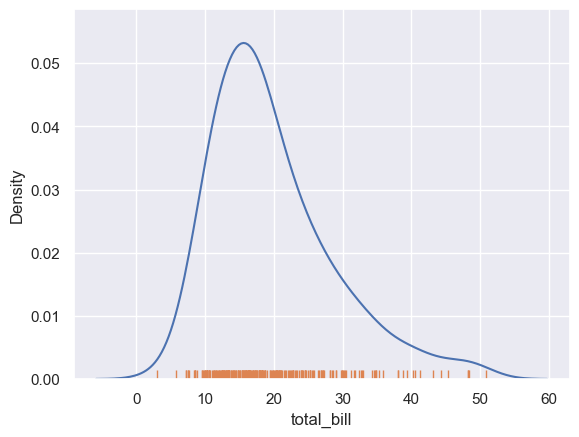

In [34]:
sns.set_theme()
sns.kdeplot(data=tips, x="total_bill")
sns.rugplot(data=tips, x="total_bill")
plt.show()

<Axes: xlabel='total_bill', ylabel='tip'>

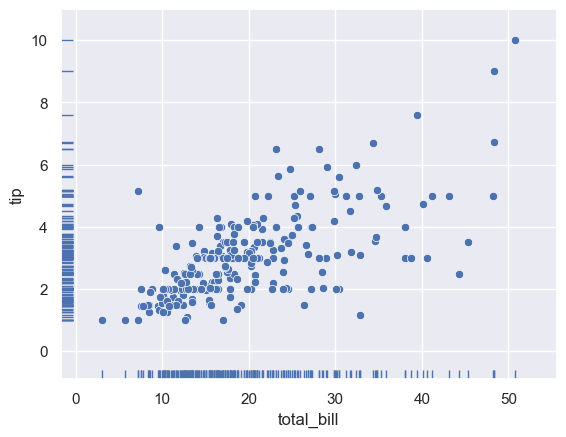

In [4]:
sns.scatterplot(data=tips, x="total_bill", y="tip")
sns.rugplot(data=tips, x="total_bill", y="tip") # 다른 그래프와 함께 분포를 볼 때 사용

In [6]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='total_bill', ylabel='tip'>

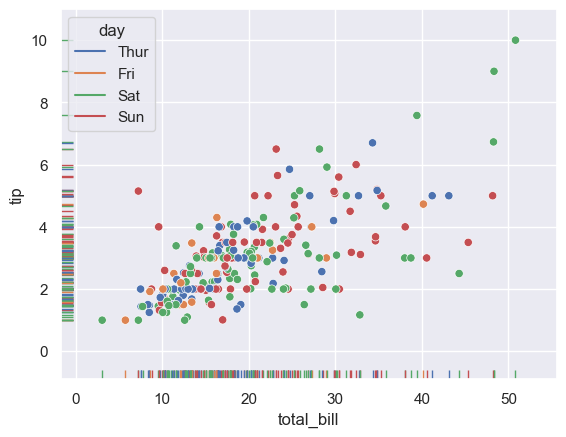

In [10]:
# hue = 범주 구분(문자열로 된 데이터들 = 범주형 데이터)
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="day")
sns.rugplot(data=tips, x="total_bill", y="tip", hue="day")

커널 밀도(kernel density)는 커널이라는 함수를 겹치는 방법으로 히스토그램보다 부드러운 형태의 분포 곡선을 보여주는 방법이다.
* kdeplot: http://seaborn.pydata.org/generated/seaborn.kdeplot.html

커널 밀도 추정에 대한 자세한 내용은 scikit-learn 패키지를 참조한다.
* http://scikit-learn.org/stable/modules/density.html

In [12]:
x = iris
x

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


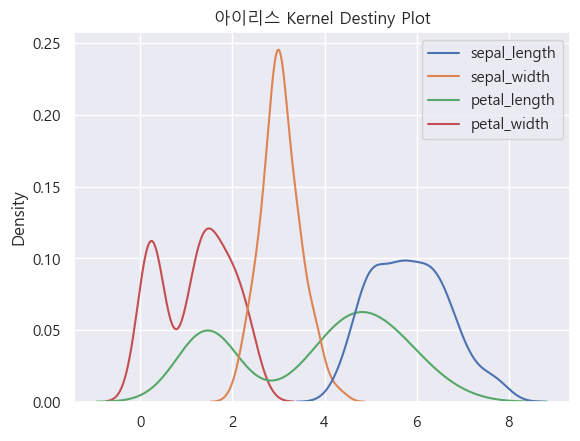

In [17]:
sns.kdeplot(x)
plt.title('아이리스 Kernel Destiny Plot')
plt.show()

Seaborn의 distplot 명령은 러그와 커널 밀도 표시 기능이 있어서 Matplotlib의 hist 명령보다 많이 사용된다.

distplot: http://seaborn.pydata.org/generated/seaborn.distplot.html

In [18]:
x = iris['sepal_length']
x

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64

C:\Users\limfl\AppData\Local\Temp\ipykernel_23660\752902341.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, kde = True, rug = True)


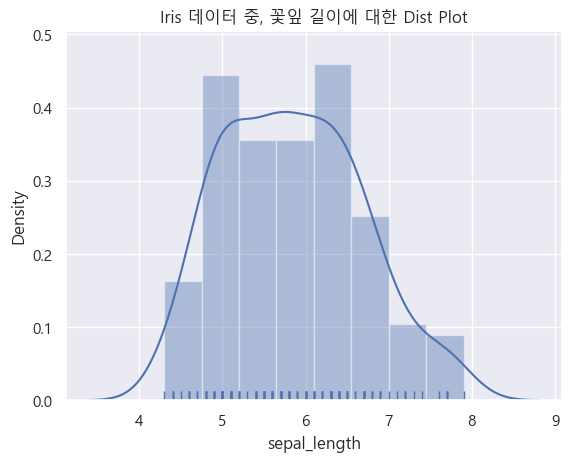

In [19]:
sns.distplot(x, kde = True, rug = True)
plt.title('Iris 데이터 중, 꽃잎 길이에 대한 Dist Plot')
plt.show()

#### 카운트 플롯
countplot 명령을 사용하면 각 카테고리 값별로 데이터가 얼마나 있는지 표시할 수 있다.

* countplot: http://seaborn.pydata.org/generated/seaborn.countplot.html

countplot 명령은 데이터프레임에만 사용할 수 있다. 사용 방법은 다음과 같다.

* countplot(x="column_name", data=dataframe)

data 인수에는 대상이 되는 데이터프레임을, x 인수에는 데이터프레임의 열 이름 문자열을 넣는다.

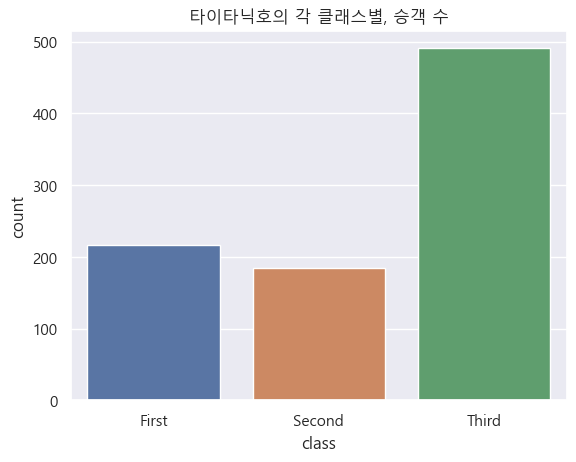

In [20]:
sns.countplot(x="class", data=titanic) 
plt.title("타이타닉호의 각 클래스별, 승객 수")
plt.show()

In [22]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [29]:
titanic['class'].unique()

['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

In [30]:
titanic['class'].value_counts()

class
Third     491
First     216
Second    184
Name: count, dtype: int64

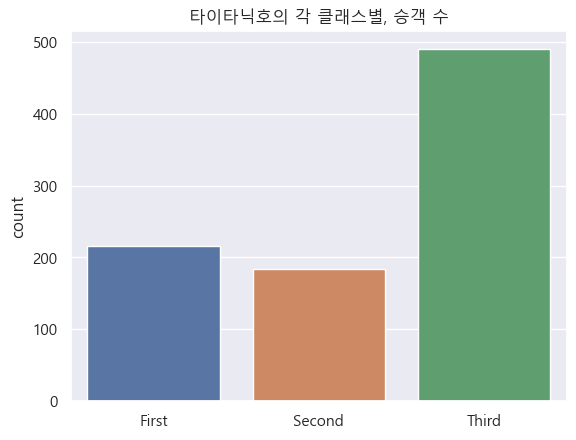

In [31]:
# 깜짝 퀴즈, barplot으로 그려보자! (복잡함)
# barplot은 x에는 범주형, y에는 수치를 넣어줘야 한다.
sns.barplot(x=titanic['class'].unique(), y= titanic['class'].value_counts()) 
plt.title("타이타닉호의 각 클래스별, 승객 수")
plt.show()

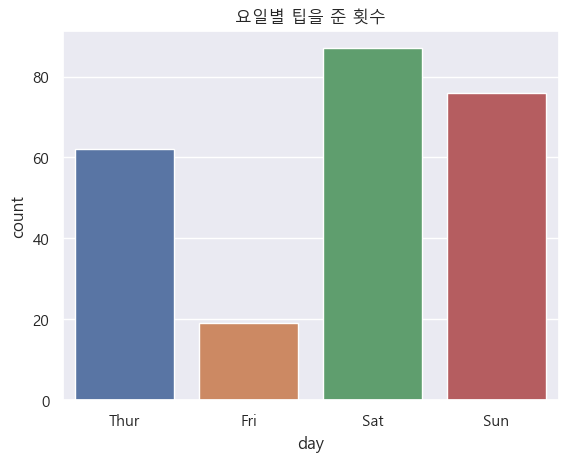

In [32]:
sns.countplot(x="day", data=tips)
plt.title("요일별 팁을 준 횟수")
plt.show()

### 다차원 데이터
데이터 변수가 여러개인 다차원 데이터는 데이터의 종류에 따라 다음과 같은 경우가 있을 수 있다.

분석하고자 하는 데이터가 모두 실수 값인 경우
분석하고자 하는 데이터가 모두 카테고리 값인 경우
분석하고자 하는 데이터가 모두 실수 값과 카테고리 값이 섞여 있는 경우

#### 2차원 실수형 데이터
만약 데이터가 2차원이고 모두 연속적인 실수값이라면 스캐터 플롯(scatter plot)을 사용하면 된다.
스캐터 플롯을 그리기 위해서는 Seaborn 패키지의 jointplot 명령을 사용한다.
jointplot 명령은 스캐터 플롯뿐 아니라 차트의 가장자리(margin)에 각 변수의 히스토그램도 그린다.

* jointplot:http://seaborn.pydata.org/generated/seaborn.jointplot.html

jointplot 명령도 데이터프레임에만 사용할 수 있다. 사용 방법은 다음과 같다.
* jointplot(x="x_name", y="y_name", data=dataframe, kind='scatter')

data 인수에는 대상이 되는 데이터프레임을, x 인수에는 x 변수가 될 데이터프레임의 열 이름 문자열을, y 인수에는 y 변수가 될 데이터프레임의 열 이름 문자열을 넣는다.
kind는 차트의 종류를 지정한다. kind='scatter'이면 스캐터 플롯이다.

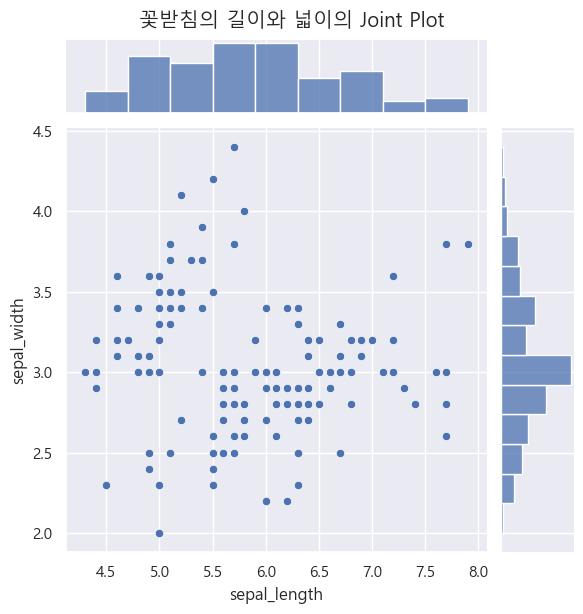

In [37]:
sns.jointplot(x="sepal_length", y="sepal_width", data=iris) # x, y의 분포를 함께 보여줌
plt.suptitle("꽃받침의 길이와 넓이의 Joint Plot", y=1.02)
plt.show()

kind='kde'이면 커널 밀도 히스토그램을 그린다.



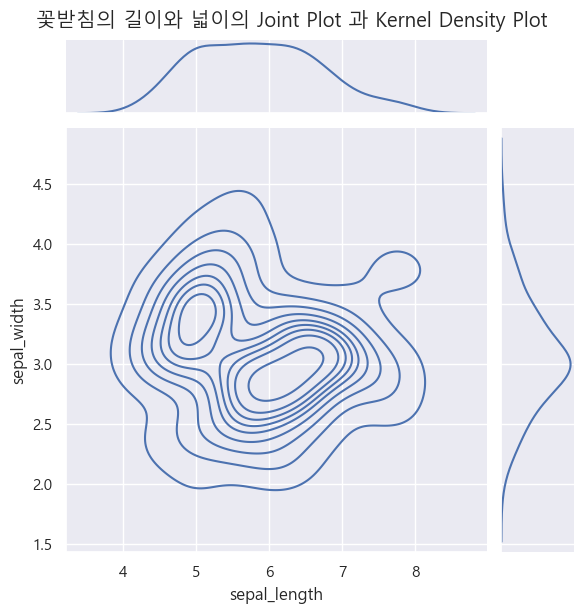

In [38]:
sns.jointplot(x="sepal_length", y="sepal_width", data=iris, kind="kde")
plt.suptitle("꽃받침의 길이와 넓이의 Joint Plot 과 Kernel Density Plot", y=1.02)
plt.show()

#### 다차원 실수형 데이터
만약 3차원 이상의 데이터라면 seaborn 패키지의 pairplot 명령을 사용한다.
pairplot은 데이터프레임을 인수로 받아 그리드(grid) 형태로 각 데이터 열의 조합에 대해 스캐터 플롯을 그린다.
같은 데이터가 만나는 대각선 영역에는 해당 데이터의 히스토그램을 그린다.

* pairplot: http://seaborn.pydata.org/generated/seaborn.pairplot.html

In [43]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


C:\Users\limfl\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


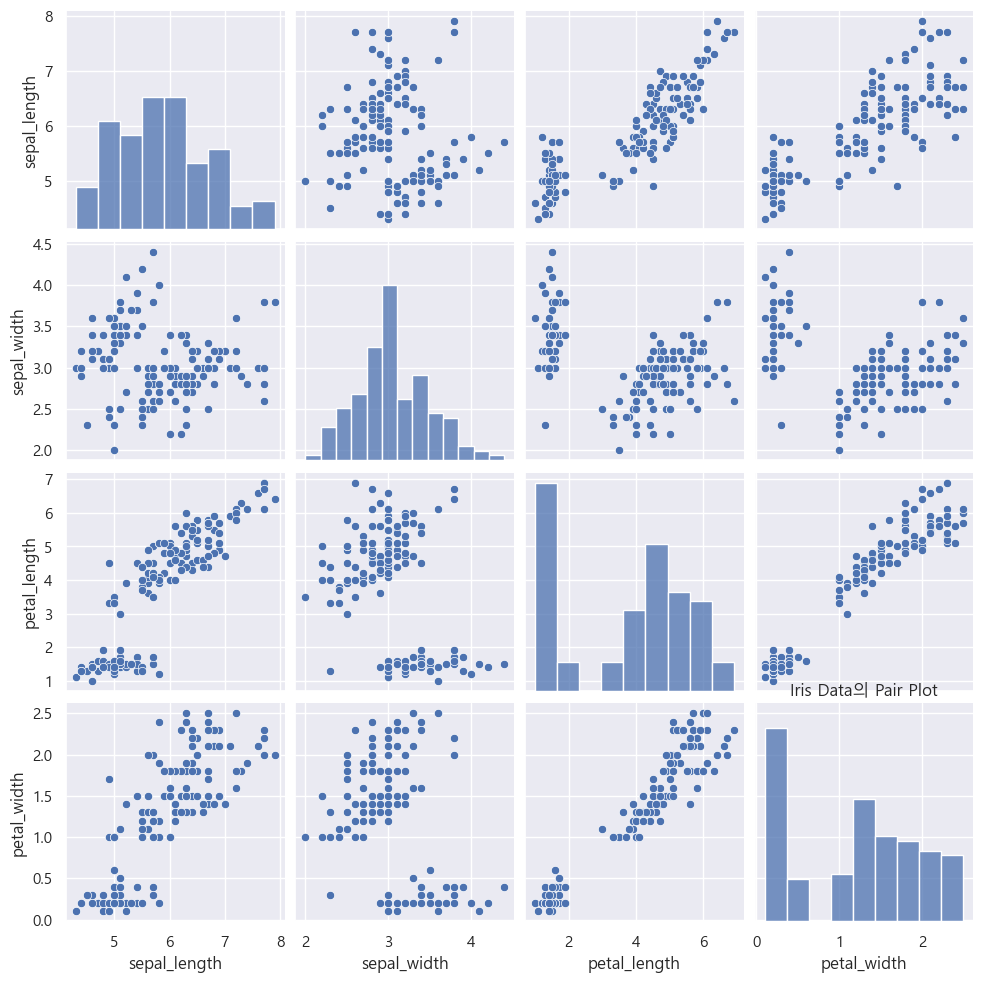

In [41]:
sns.pairplot(iris)
plt.title("Iris Data의 Pair Plot")
plt.show()

만약 카테고리형 데이터가 섞여 있는 경우에는 hue 인수에 카테고리 변수 이름을 지정하여 카테고리 값에 따라 색상을 다르게 할 수 있다.

C:\Users\limfl\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


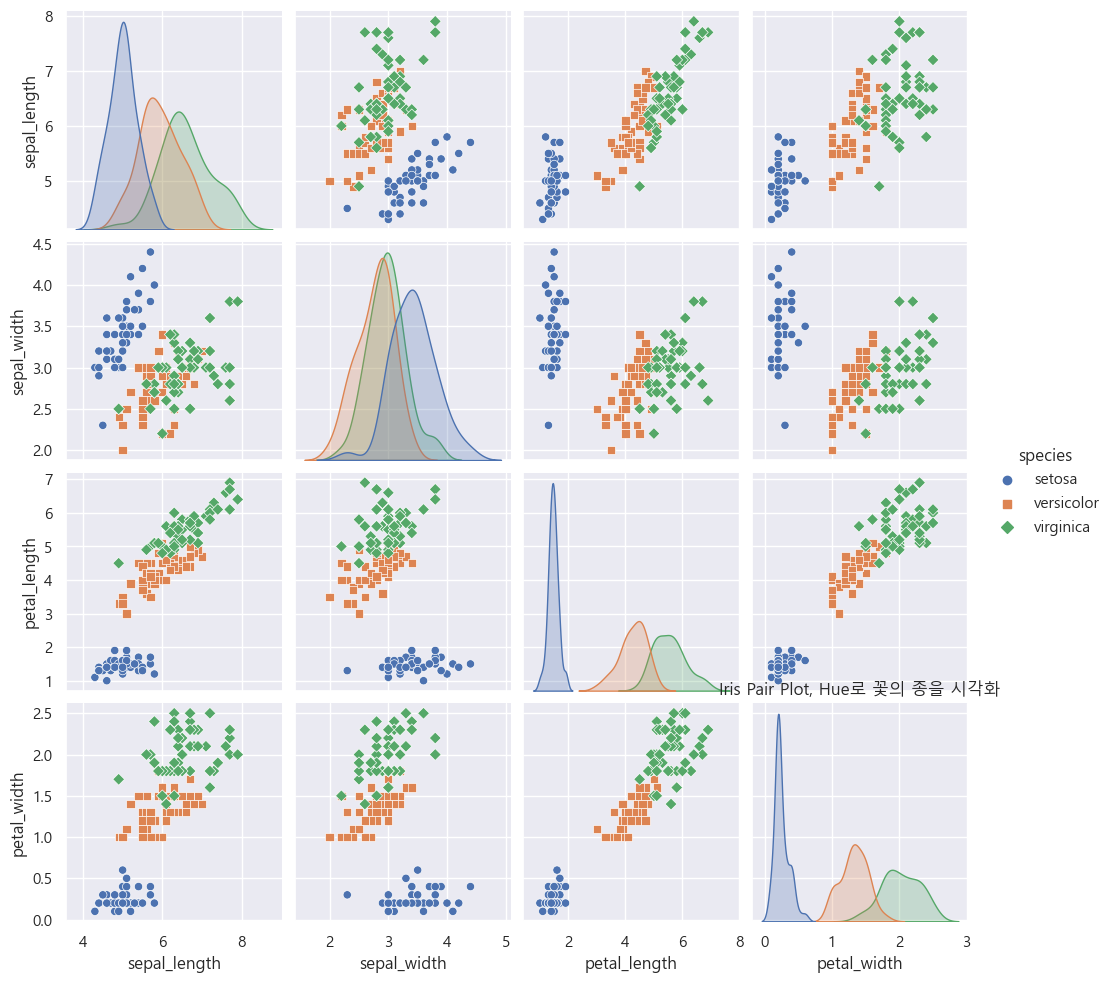

In [44]:
sns.pairplot(iris, hue="species", markers=["o", "s", "D"])
plt.title("Iris Pair Plot, Hue로 꽃의 종을 시각화")
plt.show()

In [45]:
help(sns.PairGrid)

Help on class PairGrid in module seaborn.axisgrid:

class PairGrid(Grid)
 |  PairGrid(data, *, hue=None, vars=None, x_vars=None, y_vars=None, hue_order=None, palette=None, hue_kws=None, corner=False, diag_sharey=True, height=2.5, aspect=1, layout_pad=0.5, despine=True, dropna=False)
 |  
 |  Subplot grid for plotting pairwise relationships in a dataset.
 |  
 |  This object maps each variable in a dataset onto a column and row in a
 |  grid of multiple axes. Different axes-level plotting functions can be
 |  used to draw bivariate plots in the upper and lower triangles, and the
 |  marginal distribution of each variable can be shown on the diagonal.
 |  
 |  Several different common plots can be generated in a single line using
 |  :func:`pairplot`. Use :class:`PairGrid` when you need more flexibility.
 |  
 |  See the :ref:`tutorial <grid_tutorial>` for more information.
 |  
 |  Method resolution order:
 |      PairGrid
 |      Grid
 |      _BaseGrid
 |      builtins.object
 |  
 |  

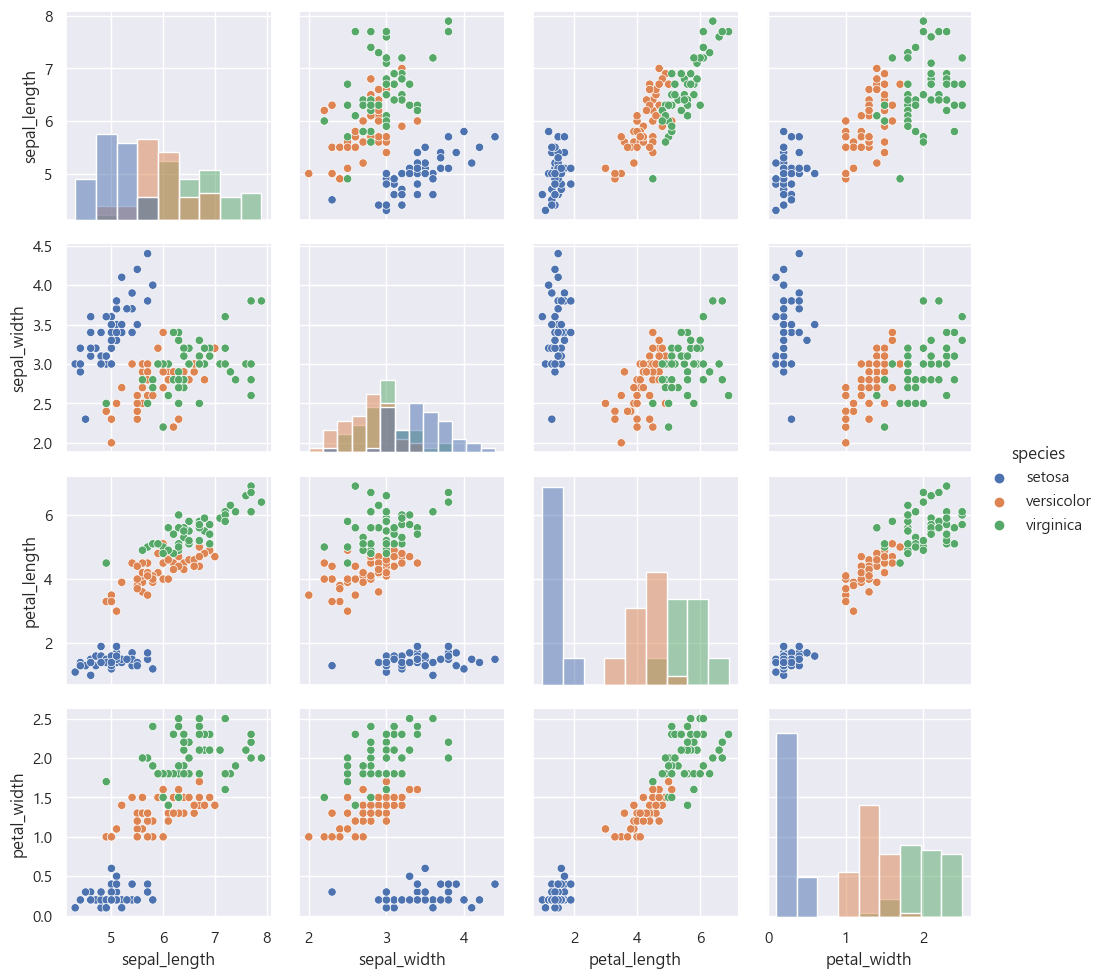

In [46]:
# pair grid
g = sns.PairGrid(iris, hue='species')

g.map_diag(sns.histplot) # 대각선
g.map_offdiag(sns.scatterplot) # 비대각선

g.add_legend()
plt.show()

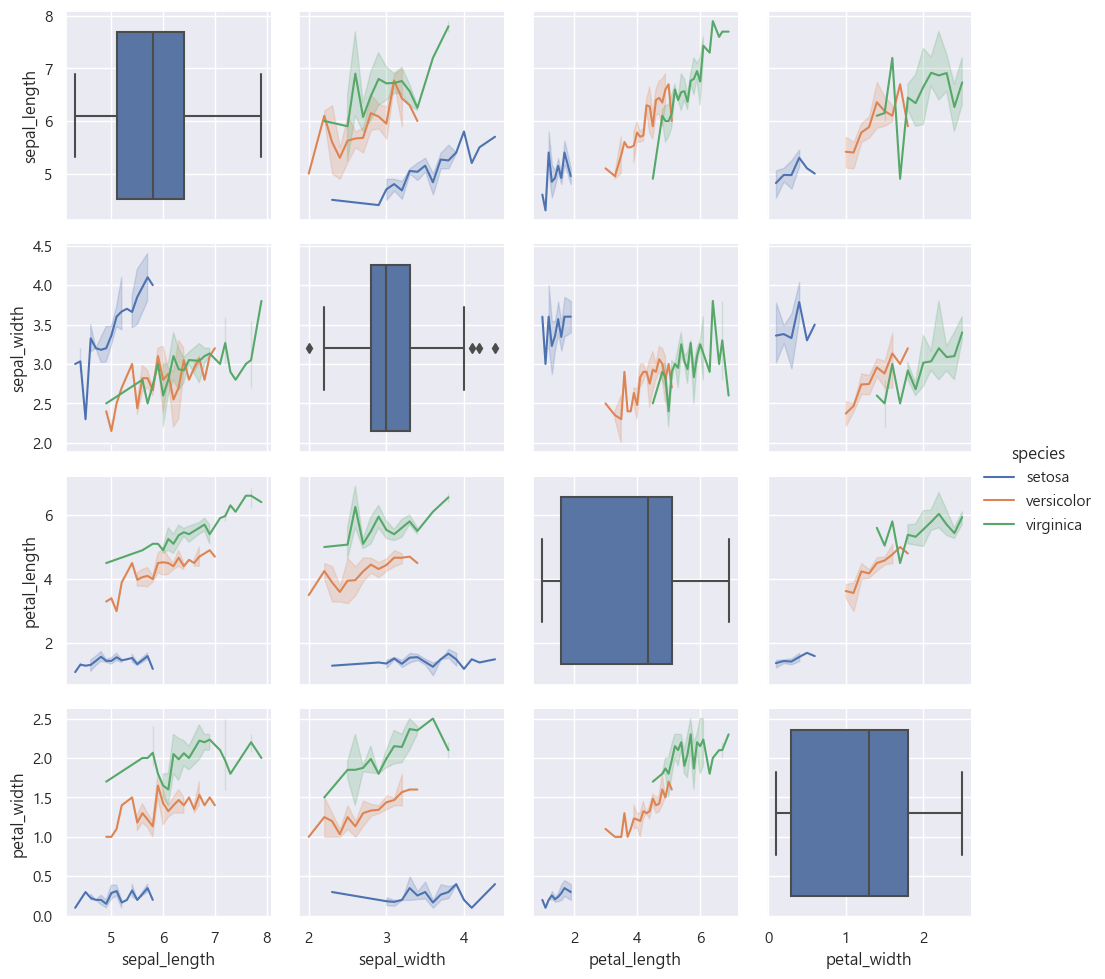

In [47]:
# pair grid
g = sns.PairGrid(iris, hue='species')

g.map_diag(sns.boxplot) # 대각선 = 박스플롯
g.map_offdiag(sns.lineplot) # 비대각선 = 라인플롯

g.add_legend()
plt.show()

#### 2차원 카테고리 데이터
만약 데이터가 2차원이고 모든 값이 카테고리 값이면 heatmap 명령을 사용한다.
* 상관관계 분석 시 사용

heatmap: http://seaborn.pydata.org/generated/seaborn.heatmap.html

In [49]:
titanic_size = titanic.pivot_table(index="class", columns="sex", aggfunc="size")
titanic_size

sex,female,male
class,,
First,94,122
Second,76,108
Third,144,347


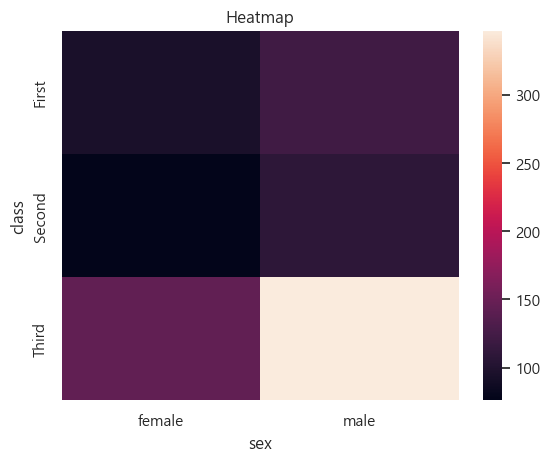

In [50]:
sns.heatmap(titanic_size)
plt.title("Heatmap")
plt.show()

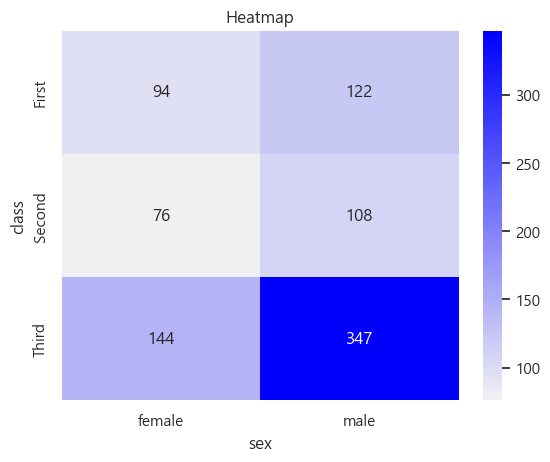

In [52]:
sns.heatmap(titanic_size, cmap=sns.light_palette("blue", as_cmap=True), annot=True, fmt="d") #annotation = 수치

plt.title("Heatmap")
plt.show()

#### 2차원 복합 데이터
만약 데이터가 2차원이고 실수 값, 카테고리 값이 섞여 있다면 기존의 플롯 이외에도 다음과 같은 분포 플롯들을 이용할 수 있다.

* barplot
* boxplot
* pointplot
* violinplot
* stripplot
* swarmplot

barplot 은 카테고리 값에 따른 실수 값의 평균과 편차를 표시하는 기본적인 바 차트를 생성한다.
평균은 막대의 높이로, 편차는 에러바(error bar)로 표시한다.

* barplot: http://seaborn.pydata.org/generated/seaborn.barplot.html

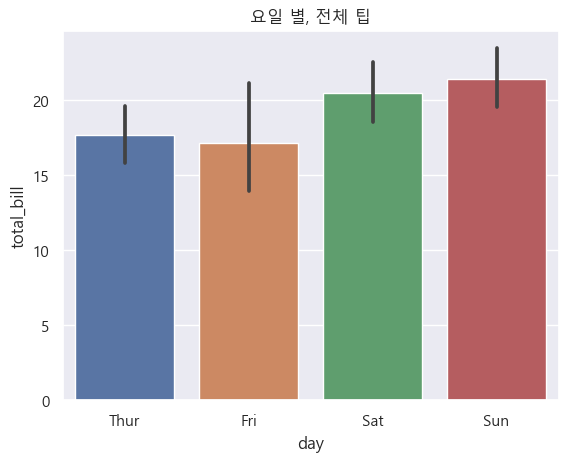

In [55]:
sns.barplot(x="day", y="total_bill", data=tips)
plt.title("요일 별, 전체 팁")
plt.show()

boxplot 명령은 박스-휘스커 플롯(Box-Whisker Plot) 혹은 간단히 박스 플롯이라 부르는 차트를 그려준다.
박스 플롯은 박스와 박스 바깥의 선(whisker)으로 이루어진다.
* boxplot: http://seaborn.pydata.org/generated/seaborn.boxplot.html

박스는 실수 값 분포에서 1사분위수(Q1)와 3사분위수(Q3)를 뜻하고 이 3사분위수와 1사분수의 차이(Q3 - Q1)를 IQR(interquartile range)라고 한다.
박스 내부의 가로선은 중앙값을 나타낸다.
박스 외부의 세로선은 1사분위 수보다 1.5 x IQR 만큼 낮은 값과 3사분위 수보다 1.5 x IQR 만큼 높은 값의 구간을 기준으로
그 구간의 내부에 있는 가장 큰 데이터와 가장 작은 데이터를 잇는 선분이다. 그 바깥의 점은 아웃라이어(outlier)라고 부르는데 일일히 점으로 표시한다.

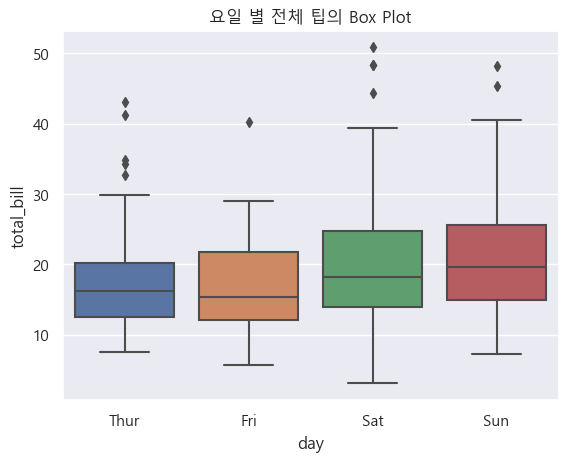

In [57]:
sns.boxplot(x="day", y="total_bill", data=tips)
plt.title("요일 별 전체 팁의 Box Plot")
plt.show()

boxplot이 중앙값, 표준 편차 등, 분포의 간략한 특성만 보여주는데 반해
violinplot, stripplot. swarmplot 등은 카테고리값에 따른 각 분포의 실제 데이터나 전체 형상을 보여준다는 장점이 있다.

violinplot은 세로 방향으로 커널 밀도 히스토그램을 그려주는데 왼쪽과 오른쪽이 대칭이 되도록 하여 바이올린처럼 보인다.
* violinplot: http://seaborn.pydata.org/generated/seaborn.violinplot.html

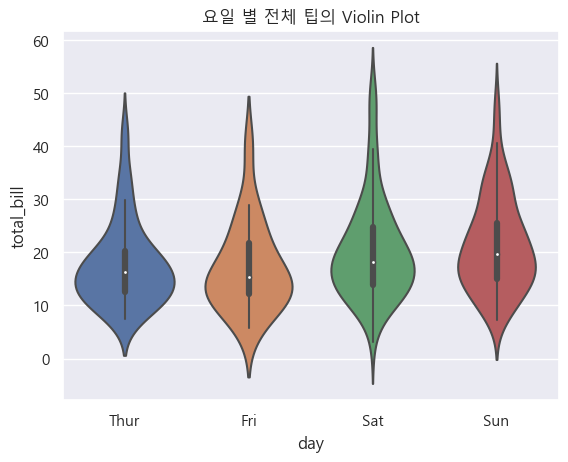

In [59]:
sns.violinplot(x="day", y="total_bill", data=tips)
plt.title("요일 별 전체 팁의 Violin Plot")
plt.show()

stripplot은 마치 스캐터 플롯처럼 모든 데이터를 점으로 그려준다.
jitter=True를 설정하면 가로축상의 위치를 무작위로 바꾸어서 데이터의 수가 많을 경우에 겹치지 않도록 한다.

* stripplot: http://seaborn.pydata.org/generated/seaborn.stripplot.html

In [62]:
import numpy as np

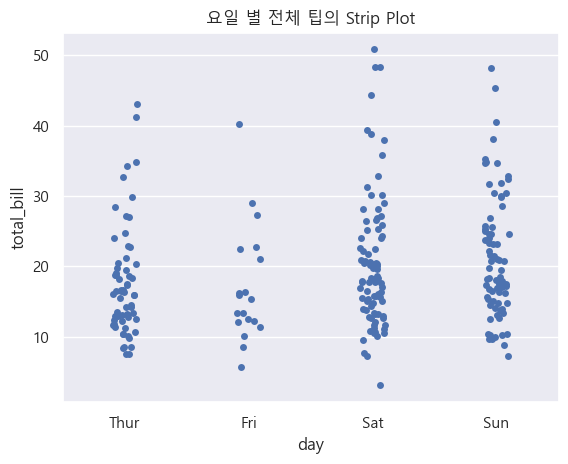

In [65]:
# 실제 데이터로 표현
np.random.seed(0)
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True) # True가 기본값, False로 바꿔보자
plt.title("요일 별 전체 팁의 Strip Plot")
plt.show()

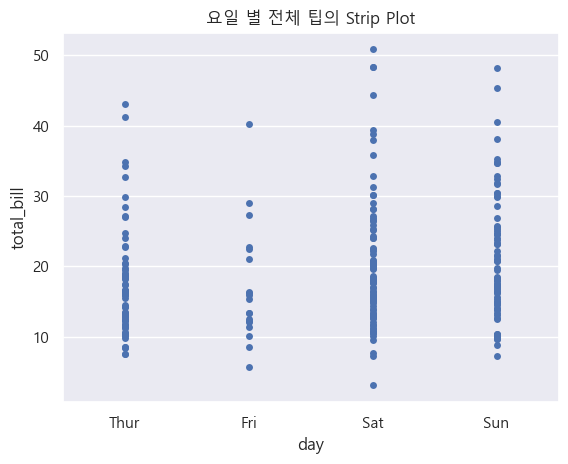

In [66]:
np.random.seed(0)
sns.stripplot(x="day", y="total_bill", data=tips, jitter=False) # True가 기본값, False로 바꿔보자
plt.title("요일 별 전체 팁의 Strip Plot")
plt.show()

swarmplot은 stripplot과 비슷하지만 데이터를 나타내는 점이 겹치지 않도록 옆으로 이동한다.
* swarmplot: http://seaborn.pydata.org/generated/seaborn.swarmplot.html

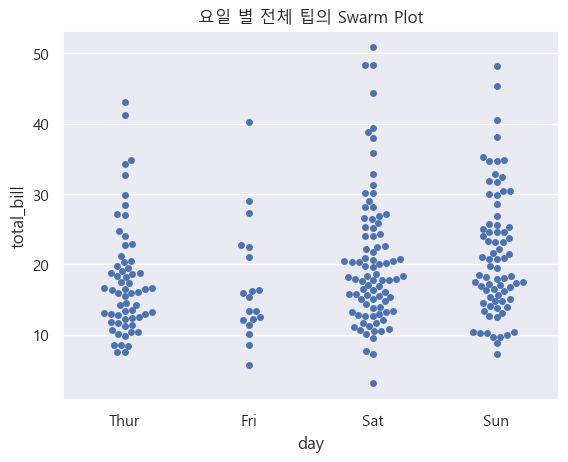

In [68]:
sns.swarmplot(x="day", y="total_bill", data=tips)
plt.title("요일 별 전체 팁의 Swarm Plot")
plt.show()

### 다차원 복합 데이터
지금까지 소개한 대부분의 명령어에는 2차원 이상의 고차원 데이터에 대해서도 분석할 수 있는 기능이 포함되어 있다.

예를 들어 barplot, violinplot, boxplot 등 에서는 두 가지 카테고리 값에 의한 실수 값의 변화를 보기 위한 hue 인수를 제공한다.

hue 인수에 카테고리 값을 가지는 변수의 이름을 지정하면 카테고리 값에 따라 다르게 시각화된다.
hue 값이 시각화되는 방법은 플롯의 종류에 따라 다르다.

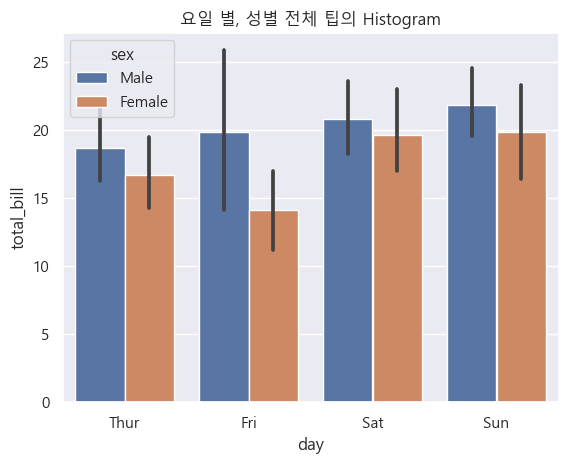

In [70]:
sns.barplot(x="day", y="total_bill", hue="sex", data=tips)
plt.title("요일 별, 성별 전체 팁의 Histogram")
plt.show()

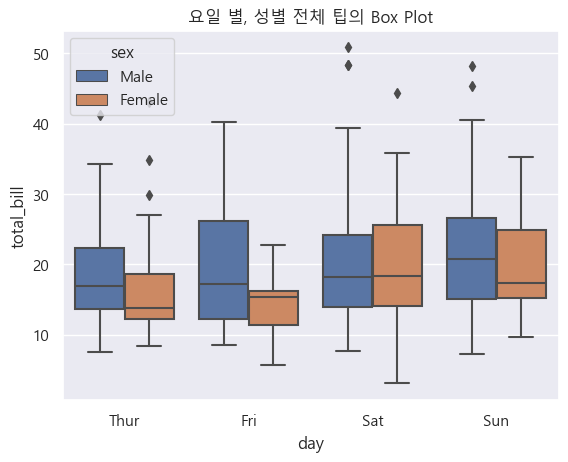

In [71]:
sns.boxplot(x="day", y="total_bill", hue="sex", data=tips)
plt.title("요일 별, 성별 전체 팁의 Box Plot")
plt.show()

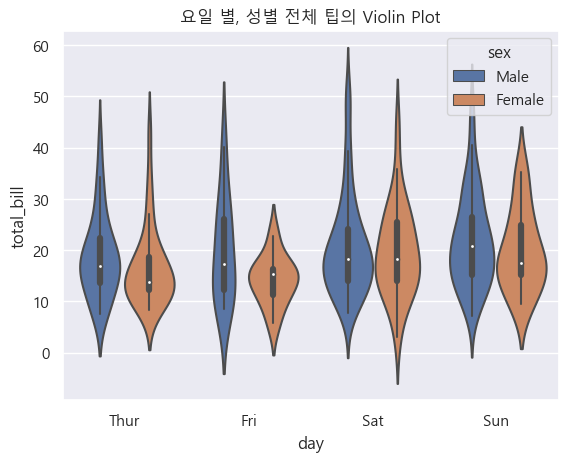

In [72]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips)
plt.title("요일 별, 성별 전체 팁의 Violin Plot")
plt.show()

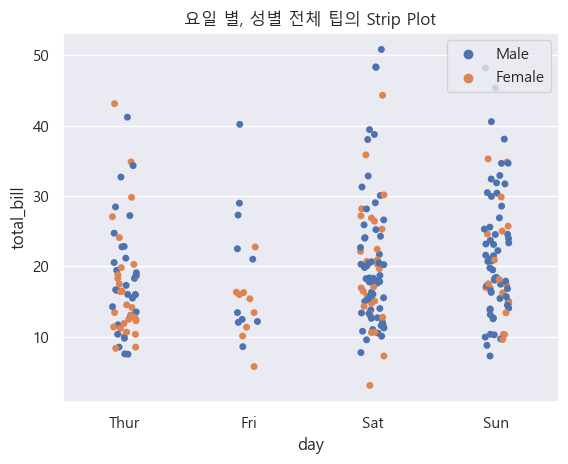

In [73]:
sns.stripplot(x="day", y="total_bill", hue="sex", data=tips, jitter=True)
plt.title("요일 별, 성별 전체 팁의 Strip Plot")
plt.legend(loc=1)
plt.show()

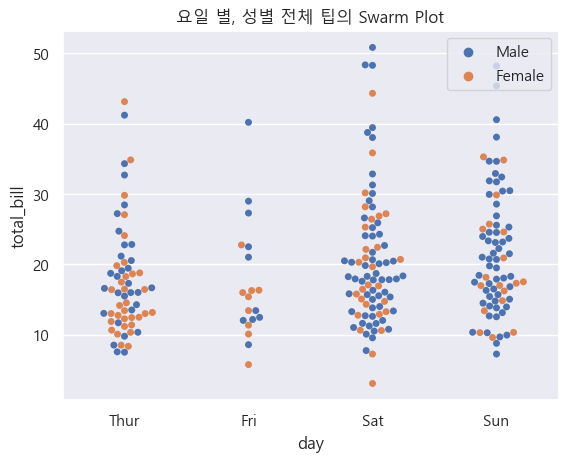

In [74]:
sns.swarmplot(x="day", y="total_bill", hue="sex", data=tips)
plt.title("요일 별, 성별 전체 팁의 Swarm Plot")
plt.legend(loc=1)
plt.show()

stripplot, violinplot, swarmplot 등 에서는 split 또는 dodge 옵션으로 시각화 방법을 변경할 수도 있다.

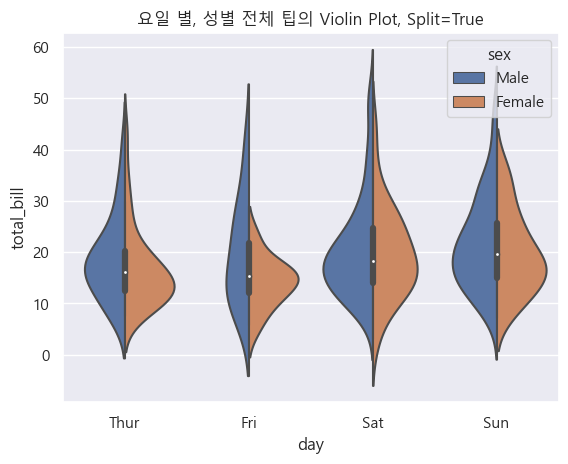

In [75]:
# split
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True)
plt.title("요일 별, 성별 전체 팁의 Violin Plot, Split=True")
plt.show()

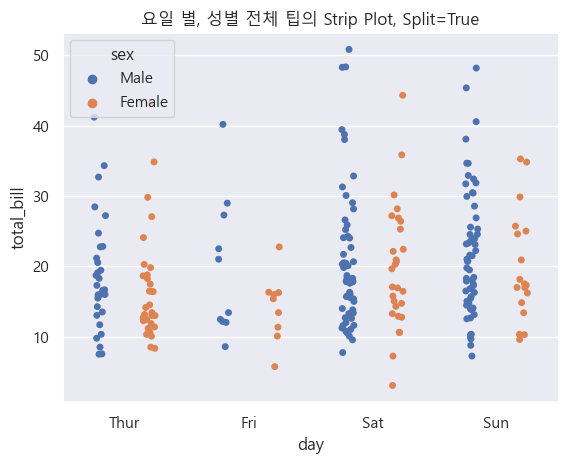

In [76]:
# dodge
sns.stripplot(x="day", y="total_bill", hue="sex",
              data=tips, jitter=True, dodge=True)
plt.title("요일 별, 성별 전체 팁의 Strip Plot, Split=True")
plt.show()

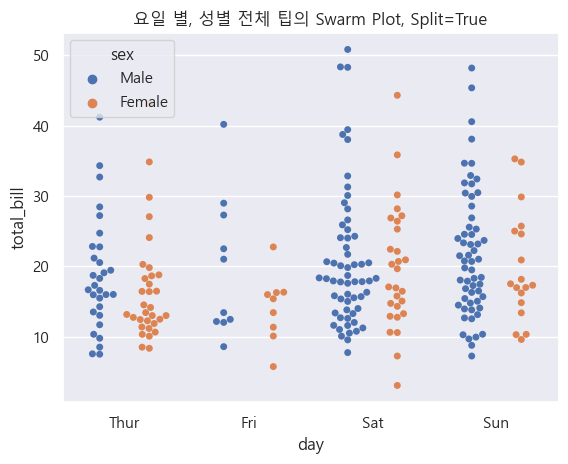

In [77]:
sns.swarmplot(x="day", y="total_bill", hue="sex", data=tips, dodge=True)
plt.title("요일 별, 성별 전체 팁의 Swarm Plot, Split=True")
plt.show()

heatmap을 이용해도 두 개의 카테고리 값에 의한 실수 값 변화를 볼 수 있다.
* heatmap: http://seaborn.pydata.org/generated/seaborn.heatmap.html

In [78]:
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [79]:
# 연도와 월별 기준 피벗하기
flights_passengers = flights.pivot(index="month", columns="year", values="passengers")
flights_passengers

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


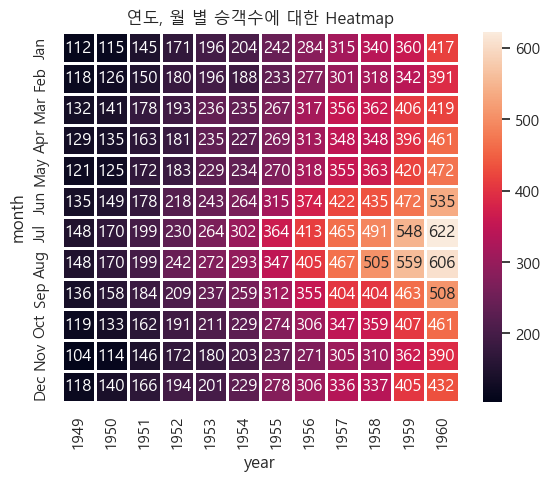

In [80]:
plt.title("연도, 월 별 승객수에 대한 Heatmap")
sns.heatmap(flights_passengers, annot=True, fmt="d", linewidths=1)
plt.show()

### catplot
catplot은 색상(hue)과 행(row) 등을 동시에 사용하여 3 개 이상의 카테고리 값에 의한 분포 변화를 보여준다.
* catplot: http://seaborn.pydata.org/generated/seaborn.factorplot.html

In [82]:
titanic.survived

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

C:\Users\limfl\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


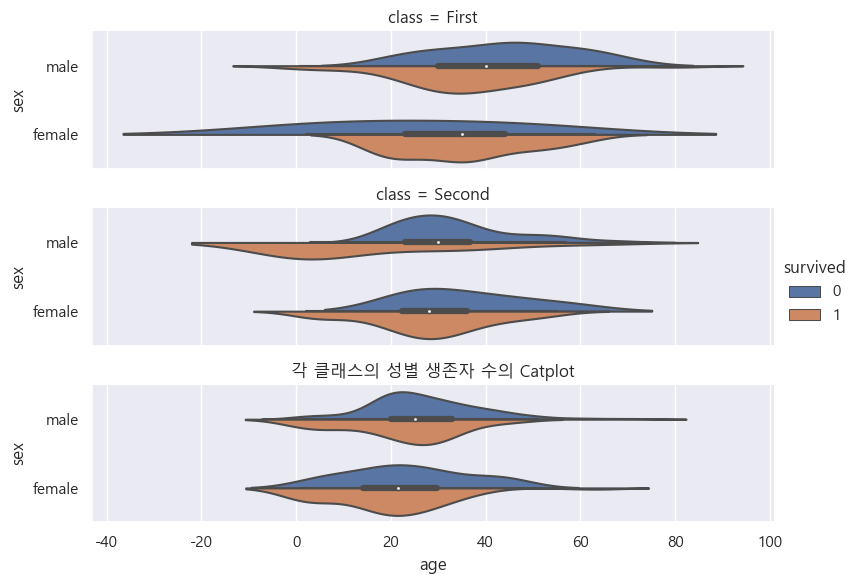

In [81]:
data = titanic[titanic.survived.notnull()]
sns.catplot(x="age", y="sex", hue="survived", row="class", data=data,
            kind="violin", split=True, height=2, aspect=4)
plt.title("각 클래스의 성별 생존자 수의 Catplot")
plt.show()

### 기타
시각화 효과를 높이기 위해 여러 종류의 차트를 겹쳐서 표시할 수도 있다.



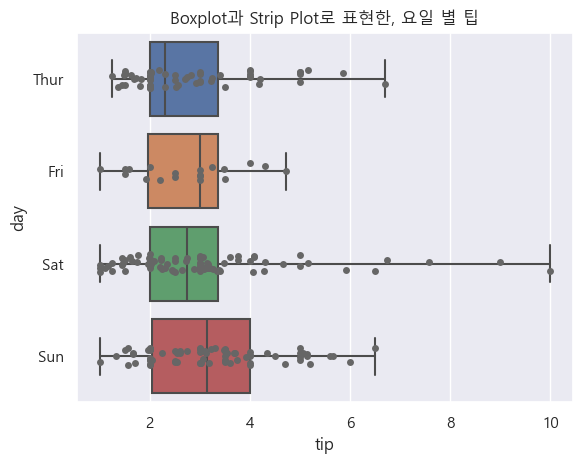

In [83]:
plt.title("Boxplot과 Strip Plot로 표현한, 요일 별 팁")

sns.boxplot(x="tip", y="day", data=tips, whis=np.inf)
sns.stripplot(x="tip", y="day", data=tips, jitter=True, color="0.4")

plt.show()

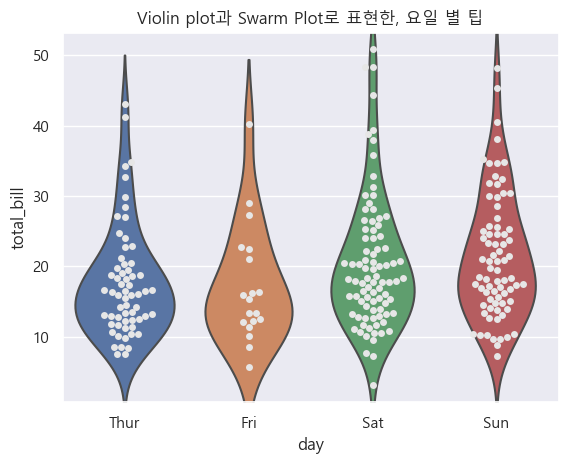

In [84]:
plt.title("Violin plot과 Swarm Plot로 표현한, 요일 별 팁")

sns.violinplot(x="day", y="total_bill", data=tips, inner=None)
sns.swarmplot(x="day", y="total_bill", data=tips, color="0.9")

plt.show()

### 스타일
Seaborn을 임포트하면 색상 등을 Matplotlib에서 제공하는 기본 스타일이 아닌 Seaborn에서 지정한 기본 스타일로 바꾼다.
따라서 동일한 Matplotlib 명령을 수행해도 Seaborn을 임포트 한 것과 하지 않은 플롯은 모양이 다르다.
자세한 내용은 다음 문서를 참조한다.
* http://seaborn.pydata.org/tutorial/aesthetics.html

set 명령으로 색상, 틱 스타일 등 전반적인 플롯 스타일을 Seaborn 기본 스타일로 바꾼다.

set_style 명령은 틱 스타일만 바꿀 수 있다. darkgrid, whitegrid, dark, white, 그리고 ticks 스타일을 제공한다.

In [85]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

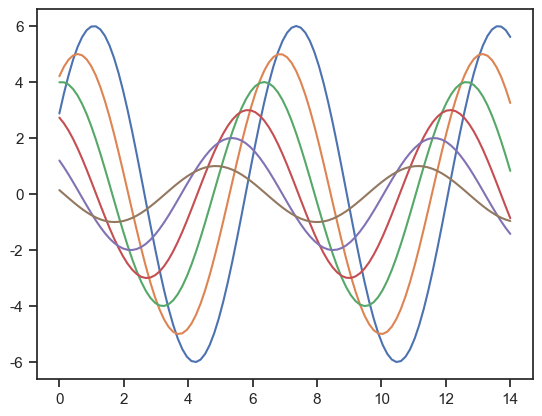

In [86]:
sns.set_style("ticks")
sinplot() # 맷플롯립 차트지만 시본 스타일 적용

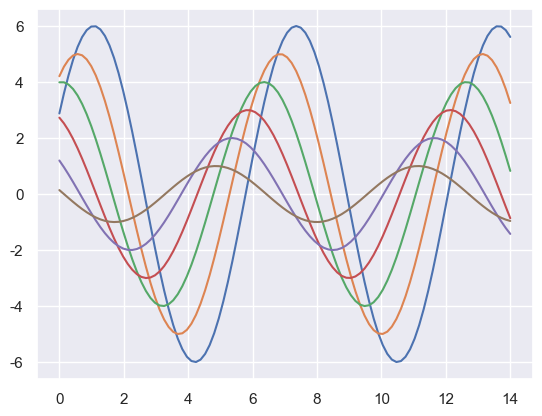

In [87]:
sns.set_style("darkgrid")
sinplot()

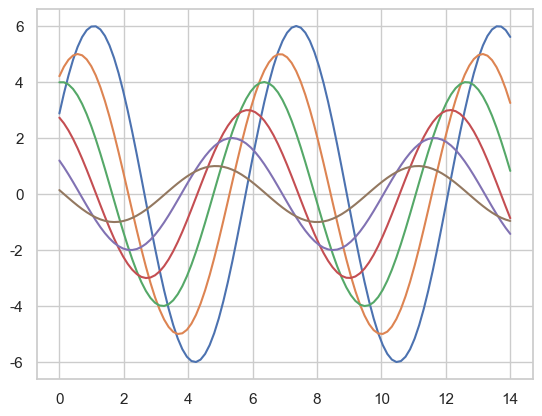

In [88]:
sns.set_style("whitegrid")
sinplot()